<a href="https://colab.research.google.com/github/VidishaPonnappa/MachineLearning/blob/main/Lesson_82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 82: Support Vector Machines - Introduction

### Teacher-Student Activities

So far you have learnt linear and logistic regression in detail. In this class, you learn about support vector machines. It is another machine learning technique that can be used both for regression as well as classification. However, it is most extensively used for classification predominantly for advanced classification problems such as image classification, face detection, voice detection etc. It uses the principle of calculating decision boundaries to separate labels/classes from one another. Specifically, in the case of SVM, we call this decision boundary a **hyperplane**. So any time you hear or read the term "hyperplane", just in your mind replace it with a decision boundary and you won't feel lost.

In this class, we are going to solve the classification of different types of flower species in the Iris Species Dataset using SVM. Let's explore the dataset.

---

### Data Description

The dataset used in the problem statement, popularly known as **Iris Dataset** or **Fisher's Dataset** is published by UCI Machine Learning Repository. It contains 3 classes of 50 instances each, where each class refers to a type of Iris flower namely:
- **Iris-setosa**
- **Iris-virginica**
- **Iris-versicolor**

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/Iris-update-1.png' width = 800>

***Image Credits:*** https://en.wikipedia.org/wiki/Iris_flower_data_set
```
  A. Image of Iris setosa by SteinsplitterBot, used under license Attribution-Share Alike 3.0 Unported from Wikimedia Commons.
  B. Image of Iris versicolor by Dlanglois, used under license Attribution-Share Alike 2.5 Generic from Wikimedia Commons.
  C. Image of Iris virginica by Flickr upload bot, used under license Attribution-Share Alike 2.0 Generic from Wikimedia Commons.
```

The big idea is that based on the length and width of sepals and petals of a flower, can we build a classification model that can tell us the species of a particular Iris flower? The answer is "Yes, we can". This is exactly what we will do in the next few classes.

The columns in the dataset are as follows:

|Name|Description|
|-|-|
|Id| Id of the instance or record.|
|SepalLengthCm| Length of the sepal in cm.|
|SepalWidthCm| Width of the sepal in cm.|
|PetalLengthCm| Length of the petal in cm.|
|PetalWidthCm|Width of the petal in cm.|
|Species|Name of the type of the flower|

**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/iris  

**Dataset Creator:** R.A. Fisher

**Citation:**
```
Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.
```


---

#### Activity 1: Data Loading and Preprocessing

So let's go through the routine steps before we build a classification model and explore the dataset.

Link to the dataset:https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iris-species.csv

In [ ]:
# S1.1: Load the dataset.
import pandas as pd

df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iris-species.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let's look at the kind of values each of the columns have, the number of rows and columns in the dataset and whether the dataset has any missing values or not.

In [ ]:
# S1.2: Get the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Except for the last column, all the columns have floating-point values and the last column has an object-type data-type. There are 150 rows and 6 columns. And there are no missing values in the dataset because all the columns contain 150 non-null values.

Now let's verify the count of each type of flower samples in the dataset.

In [ ]:
# S1.3: Get the count of each type of flower samples in the dataset.
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

As mentioned in the data description, there are 50 samples for each type of flower.

Let's add another column `Label` to the DataFrame to convert the non-numeric target column `Species` into numeric using the `map()` function.

In [ ]:
# S1.4: Add a column in the Iris DataFrame to resemble the non-numeric 'Species' column as numeric using 'map()' function.
# Create the numeric target column 'Label' to 'iris_df' using 'map()'.
df['Label'] = df['Species'].map({"Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica" : 2})
# Verify the count of each type of flower samples in the 'Label' column.
df['Label'].value_counts()

0    50
1    50
2    50
Name: Label, dtype: int64

----

#### Activity 2: Data Visualisation^

Let's look into the relationship that may exist between the features of each type of flower.

Let's create a scatter plot between `SepalLengthCm` and `SepalWidthCm` columns using the `scatterplot()` function of the `seaborn` module and differentiate between the data points of different classes using the `hue` parameter.

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

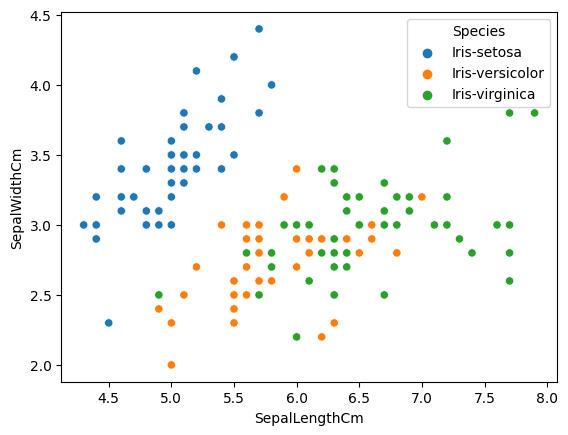

In [ ]:
# S2.1: Create a scatter plot between the 'SepalLengthCm' and 'SepalWidthCm' columns using the 'scatterplot()' function of the 'seaborn' module.
# Differentiate between the data points of different classes using the 'hue' parameter.
import seaborn as sns

sns.scatterplot(x = df['SepalLengthCm'], y = df['SepalWidthCm'], hue = df['Species'])


As it can be observed in the output above, class `Iris-setosa` can be differentiated using `SepalLengthCm` and `SepalWidthCm` but classes `Iris-virginica` and `Iris-versicolor` overlap each other.

The reason being **`Iris-setosa`** has a smaller sepal length but high sepal width, **`Iris-versicolor`** has points in the middle for both sepal length and width and  **`Iris-virginica`** has high sepal length and width.

Let's create a scatter plot between `PetalLengthCm` and `PetalWidthCm` columns and differentiate between the data points of different classes.

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

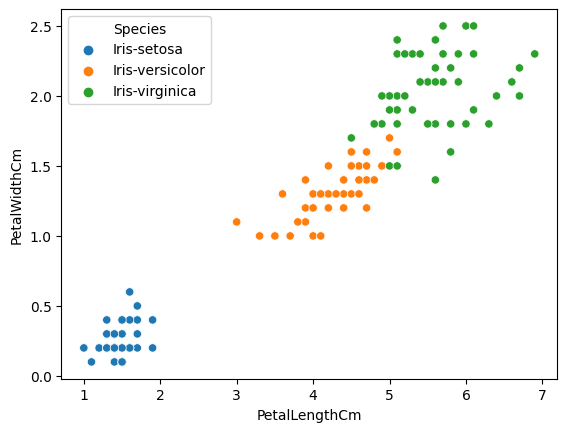

In [ ]:
# S2.2: Create a scatter plot between the 'PetalLengthCm' & 'PetalWidthCm' columns & differentiate between the data points of different classes. --> SEPAL TO PETAL
sns.scatterplot(x = df['PetalLengthCm'], y = df['PetalWidthCm'], hue = df['Species'])

In the output, two clusters of points are separated where one cluster describes **`Iris-setosa`** and the second cluster describes the other two flower types **`Iris-versicolor`** and **`Iris-virginica`**.


Again, the output describes the properties, where **`Iris-setosa`** has the smallest petal width and length and **`Iris-versicolor`** has average width and length and **`Iris-virginica`** has the higher petal width and length out of the three flower types

Now, let's create a scatter plot for another combination between the `SepalLengthCm` and `PetalLengthCm` columns and differentiate between the data points of different classes.

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

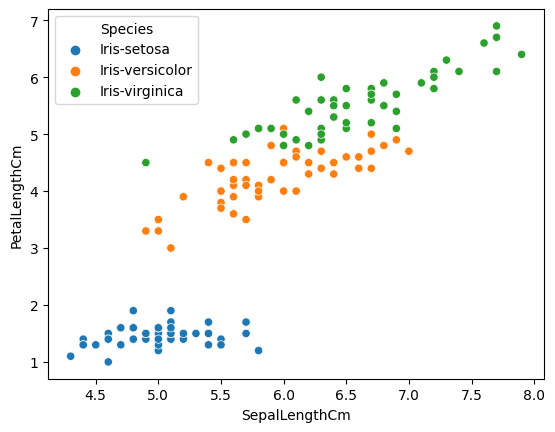

In [ ]:
# S2.3: Create a scatter plot between the 'SepalLengthCm' & 'PetalLengthCm' columns and differentiate between the data points of different classes.
sns.scatterplot(x = df['SepalLengthCm'], y = df['PetalLengthCm'], hue = df['Species'])

As per the properties, the output again displays two clusters where the **`Iris-setosa`** has the smallest length of the three classes, **`Iris-versicolor`** has the medium length and **`Iris-virginica`** has a high length. But due to the small margin between the medium and high length, the **`Iris-versicolor`** and **`Iris-virginica`** data points are overlapping each other.

Let's create one more scatter plot for another combination between the `SepalWidthCm` and `PetalWidthCm` columns and differentiate between the data points of different classes.

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

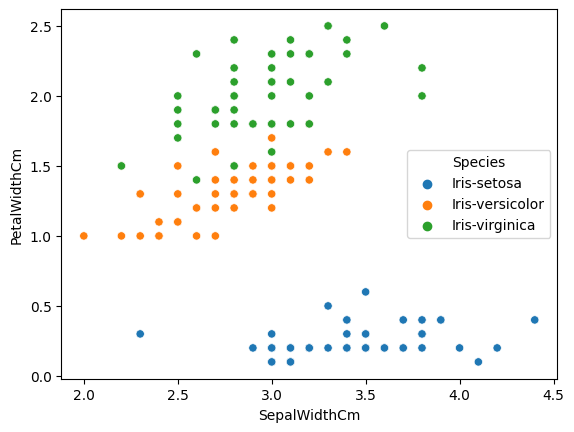

In [ ]:
# S2.4: Create a scatter plot between the 'SepalWidthCm' and 'PetalWidthCm' columns and differentiate between the data points of different classes.
sns.scatterplot(x = df['SepalWidthCm'], y = df['PetalWidthCm'], hue = df['Species'])

Again describing the properties, the graph has two clusters one for **`Iris-setosa`** with with high sepal width and small petal width and another for one **`Iris-versicolor`** and **`Iris-virginica`** for middle and high sepal and petal width respectively.

In this graph, however, we can, of course, differentiate data points of  **`Iris-setosa`** class as well as **`Iris-versicolor`** and **`Iris-virginica`**  class from each other with only a few data points of the last two classes overlapping each other.

In all four graphs, we can conclude that there is some pattern between the lengths and widths of the sepals and petals of a flower that distinguishes between the different species of Iris flower. So we can create a decision boundary to distinguish them. For this, we will use **Support Vector Machines** (**SVM**).

Let's learn more about SVM in the next activity.

----

#### Activity 3: Support Vector Machines^^

As mentioned at the start of this class, the Support Vector Machine is one of the machine learning algorithms used for solving classification and regression problems. **For classification, we use Support Vector Classifier (SVC) and for regression, we use Support Vector Regressor (SVR).**

Just like Logistic Regression, Support Vector Classifier (SVC), also finds a decision boundary to separate the classes/labels from each other. This decision boundary is called a hyperplane.


Now, the question is why a hyperplane?

Consider the image below where a scatter plot is created for the classification of two classes (colour-coded as orange and green along with the different shapes).

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/misclassified-points-1.png' width = 800>

A straight line (decision boundary in this case) separates the two classes marked as orange and green. However, two green samples and one orange sample is wrongly classified or misclassified.

In SVM, these points are used to create a boundary around each side of the hyperplane as shown in the image below. The area enclosed between the two boundaries around a hyperplane is called a **margin**. The data points (or samples) used for the creation of these boundaries around the hyperplane are known as **Support Vectors**.

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/misclassified-points-2.png' width = 800 >


**Note:** To easily understand a hyperplane in Support Vector Machines, we consider only two independent variables (or features) out of $N$. So for 2 features, a hyperplane is a straight line. For 3 features, a hyperplane is a plane and for more than 3 features, a hyperplane is some high-dimensional figure which we cannot visualise.

Without any further ado, let's create our own model for SVM to classify Iris flower types.


---

#### Activity 4: Model Building & Kernel Trick^^^

Let's create an SVM classification model using the independent features `SepalLengthCm` , `SepalWidthCm`, `PetalLengthCm` , `PetalWidthCm` and target variable as `Label` which will classify the flowers into label `0`, `1` and `2`.

Support Vector Classifier can be implemented using the `SVC` class constructor of the `sklearn.svm` module.

1. Import `SVC` class from the `sklearn.svm` module.

2. Create `X` and `y` variable to store DataFrames containing features  (`SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm` columns) and target variable (`Label` column) respectively from the `iris_df` DataFrame.

3. Using the `train_test_split()` function, split the data into training and testing sets such that the test set has 33% of one-third of the total samples.

4. Create an object of the `SVC` class, say `svc_model` and pass `kernel = "linear"` as input to its constructor.

5. Call the `fit()` function of the `SVC` class on the object created and pass `X_train` and `y_train` as inputs to the function.

In the fourth step, we have used the `kernel = "linear"` parameter to define the kind of decision boundary to be created.

**Kernel Trick:**

As we learnt above, SVM classification is done in higher dimensions which requires transforming and mapping the data points in higher dimensions. To do his transformation, we need to define a parameter so that an optimum decision surface (hyperplane/decision boundary) can be created to classify the data points. Some of the major kernels for SVC are:

- **I.**  Linear Kernel (`'linear'`)

- **II.** Gaussian Radial Basis Function Kernel (`'rbf'`)

- **III.** Polynomial Kernel (`'poly'`)

Linear kernels are used for linear hyperplanes (linear classification) and RBF and polynomial kernels are used for non-linear hyperplanes (non-linear classification) for efficient and accurate models.

You will learn to use different types of kernels in different problem statements as you move along in this course.

Let's start with building an SVC model with a linear kernel for classification.

In [ ]:
# S4.1: Create a model for Support Vector classification to classify the flower types into labels '1' , '2', and '3'.
# Import all the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Create X and y variables
y = df['Label']
X = df [['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
# Create the SVC model
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)
svc_model.score(X_train, y_train)

0.97

The accuracy score is 97% for the Support Vector Classifier (SVC) linear model. However, let's make the predictions on the train set and compare them with the actual labels.

In [ ]:
# S4.2: Make predictions on the train dataset by using the 'predict()' function.
# Compute the predictions
y_train_pred_svc = pd.Series(svc_model.predict(X_train))
# Print the occurrence of each flower type computed in the predictions.
y_train_pred_svc.value_counts()

2    35
1    34
0    31
dtype: int64

All three labels have been identified by the SVC model. Let's repeat the above exercise for the test set.

In [ ]:
# S4.3: Make predictions on the test dataset by using the 'predict()' function.
# Compute the predictions
y_test_pred_svc = pd.Series(svc_model.predict(X_test))
# Print the occurrence of each flower type computed in the predictions.
y_test_pred_svc.value_counts()

0    19
2    16
1    15
dtype: int64

As it can be observed all three labels are identified. Let's create a confusion matrix to calculate True Positives, False Positives, True Negatives and False Negatives to evaluate the SVC linear model.

In [ ]:
# S4.4: Create a confusion matrix for the test set.
# Import the libraries
from sklearn.metrics import confusion_matrix, classification_report
# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svc)
cm

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

The confusion matrix displays that there are no misclassifications.

Let's print the classification report to observe the recall, precision and f1-scores for linear SVC on Iris DataFrame

In [ ]:
# S4.5: Display recall, precision and f1-score values for the test set.
print(classification_report(y_test, y_test_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



The f1-scores for the classes are exactly 1. This means the SVC model has classified all the species of the Iris flower correctly.

Let's stop here. In the next class, you will learn to visualise the hyperplanes created by SVC to distinguish between different species of the Iris flower.


---


### **Project**
You can now attempt the **Applied Tech. Project 82 - Support Vector Machines** on your own.

**Applied Tech. Project 82 - Support Vector Machines**: https://colab.research.google.com/drive/1HsyTHufbM712sZgbcahy6EEwPQnnobrU

---